# Семинар 3



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('laptop_price.csv', encoding_errors='ignore')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
def memory(x):
    dict1 = {'GB': 1,
            'TB': 1024,
            'MB': 0.0009765625}
    result = 0
    list1 = x.split(' +  ')
    for i in range(len(list1)):
        list_t = (list1[i]).split(' ')
        for k, v in dict1.items():
            if list_t[0].endswith(k):
                result += float(list_t[0].replace(k, '')) * v

    return int(result)

In [4]:
df['Memory_Amount'] = df.Memory.apply(memory)

In [5]:
df[20:30] # Первая строка с 2 носителями - индекс 21, далее 28

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,191.90,32
21,22,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,999.00,1152
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,500
23,24,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.00,256
24,25,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91kg,659.00,256
25,26,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,418.64,1024
26,27,Apple,MacBook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,1099.00,128
27,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,256
28,29,Dell,Latitude 5590,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,1298.00,512
29,30,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,896.00,1024


In [6]:
df.Memory_Amount.unique() # какие количества памяти присутствуют

array([ 128,  256,  512,  500, 1024,   32, 1152,   64, 1280, 2304, 2048,
       1536,  756, 2176,   16,  768, 2560, 1088,  180,  240,    8,  508],
      dtype=int64)

In [7]:
def memory_type(x):
    result = ''
    list1 = x.split(' +  ')
    for i in range(len(list1)):
        list_t = (list1[i]).split(' ')
        result += '' if result == list_t[1] else (' + ' + list_t[1]) if result !='' else list_t[1]

    return result

In [8]:
df['Memory_Type'] = df.Memory.apply(memory_type)
df[20:30]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,191.90,32,Flash
21,22,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,999.00,1152,SSD + HDD
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,500,HDD
23,24,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.00,256,SSD
24,25,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91kg,659.00,256,SSD
25,26,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,418.64,1024,HDD
26,27,Apple,MacBook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,1099.00,128,Flash
27,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,256,SSD
28,29,Dell,Latitude 5590,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,1298.00,512,SSD
29,30,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,896.00,1024,HDD


In [9]:
df.Memory_Type.value_counts()

SSD             641
HDD             375
SSD + HDD       200
Flash            74
Hybrid           10
SSD + Hybrid      2
Flash + HDD       1
Name: Memory_Type, dtype: int64

## Задание 2
### 2.2 Поставьте в признаке SSD 1, если ноутбук действительно с типом носителя SSD¶

In [10]:
df['SSD'] = 0
df.loc[df.Memory_Type.str.contains('SSD'), 'SSD']= 1
df[20:30]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type,SSD
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,191.90,32,Flash,0
21,22,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,999.00,1152,SSD + HDD,1
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,500,HDD,0
23,24,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.00,256,SSD,1
24,25,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91kg,659.00,256,SSD,1
25,26,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,418.64,1024,HDD,0
26,27,Apple,MacBook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,1099.00,128,Flash,0
27,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,256,SSD,1
28,29,Dell,Latitude 5590,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,1298.00,512,SSD,1
29,30,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,896.00,1024,HDD,0


In [11]:
df.Memory_Type[df.SSD == 1].value_counts()

SSD             641
SSD + HDD       200
SSD + Hybrid      2
Name: Memory_Type, dtype: int64

In [12]:
df.Memory_Type[df.SSD == 0].value_counts()

HDD            375
Flash           74
Hybrid          10
Flash + HDD      1
Name: Memory_Type, dtype: int64

### 2.3. Уберите в признаке Weight значения 'kg' и поменяйте его тип данных на вещественный

In [13]:
df.Weight = df.Weight.apply(lambda x: float(x.replace('kg', '')))
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128,Flash,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,SSD,1


In [14]:
df.Weight.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
1303 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


## Задание 5
### 5.1 Ноутбуков каких компаний и с каким процессором больше?

In [15]:
cross2 = pd.crosstab(index=df.Company, columns=df.Cpu)
cross2.head()

Cpu,AMD A10-Series 9600P 2.4GHz,AMD A10-Series 9620P 2.5GHz,AMD A10-Series A10-9620P 2.5GHz,AMD A12-Series 9700P 2.5GHz,AMD A12-Series 9720P 2.7GHz,AMD A12-Series 9720P 3.6GHz,AMD A4-Series 7210 2.2GHz,AMD A6-Series 7310 2GHz,AMD A6-Series 9220 2.5GHz,AMD A6-Series 9220 2.9GHz,...,Intel Pentium Dual Core 4405U 2.1GHz,Intel Pentium Dual Core 4405Y 1.5GHz,Intel Pentium Dual Core N4200 1.1GHz,Intel Pentium Quad Core N3700 1.6GHz,Intel Pentium Quad Core N3710 1.6GHz,Intel Pentium Quad Core N4200 1.1GHz,Intel Xeon E3-1505M V6 3GHz,Intel Xeon E3-1535M v5 2.9GHz,Intel Xeon E3-1535M v6 3.1GHz,Samsung Cortex A72&A53 2.0GHz
Company,,,,,,,,,,,,,,,,,,,,,
Acer,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,2,3,0,0,0,0
Apple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asus,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2,5,0,0,0,0
Chuwi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3,1,2,0,0,0


In [16]:
cross2.max().max()

54

In [17]:
rowmax = cross2.max(axis=1)
rowmax

Company
Acer         11
Apple         3
Asus         30
Chuwi         1
Dell         44
Fujitsu       2
Google        2
HP           45
Huawei        1
LG            2
Lenovo       54
MSI          30
Mediacom      3
Microsoft     2
Razer         3
Samsung       5
Toshiba      15
Vero          2
Xiaomi        1
dtype: int64

In [18]:
rowmax[rowmax == max(rowmax)].index.tolist()

['Lenovo']

In [19]:
colmax = cross2.max(axis=0)
colmax[colmax == max(colmax)].index.tolist()

['Intel Core i5 7200U 2.5GHz']

# Семинар 4
### 2.2 Изучите распределение компаний производителей

In [20]:
df2 = pd.read_csv('laptop_11.csv')
df2.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,Flash,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD,1


Просто мысль, что удобнее смотреть на график в горизонтальном исполнении:

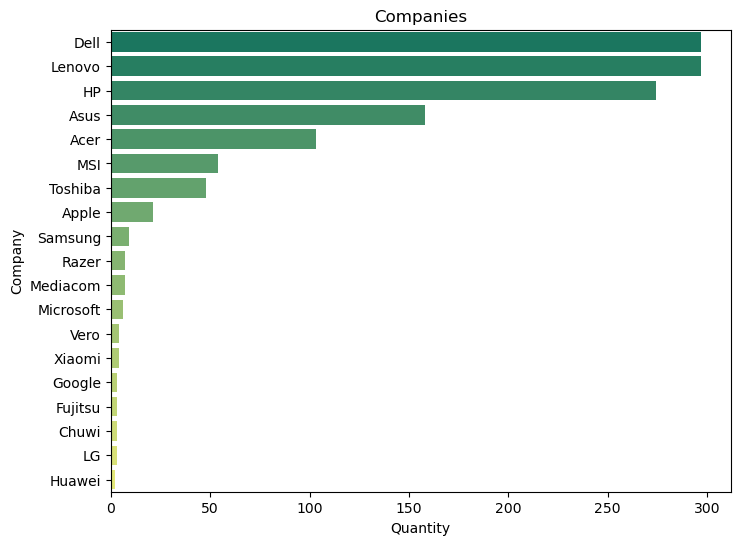

In [21]:
com_c = df2.value_counts(df.Company)
plt.figure(figsize=(8, 6))

plt.title('Companies')
sns.barplot(y=com_c.index, x=com_c.values, palette='summer', orient="h")
plt.xlabel('Quantity');

### 3.2 Постройте график в относительных величинах
Как исключить процессоры Самсунг во время нормализации:

In [24]:
data1n = pd.crosstab(index=df2.Company[df2.Cpu_Company != 'Samsung'], columns=df2.Cpu_Company[df2.Cpu_Company != 'Samsung'], 
                     normalize='index')
data1n.head().style.format(precision=2)

Cpu_Company,AMD,Intel
Company,,
Acer,0.10,0.90
Apple,0.00,1.00
Asus,0.07,0.93
Chuwi,0.00,1.00
Dell,0.00,1.00


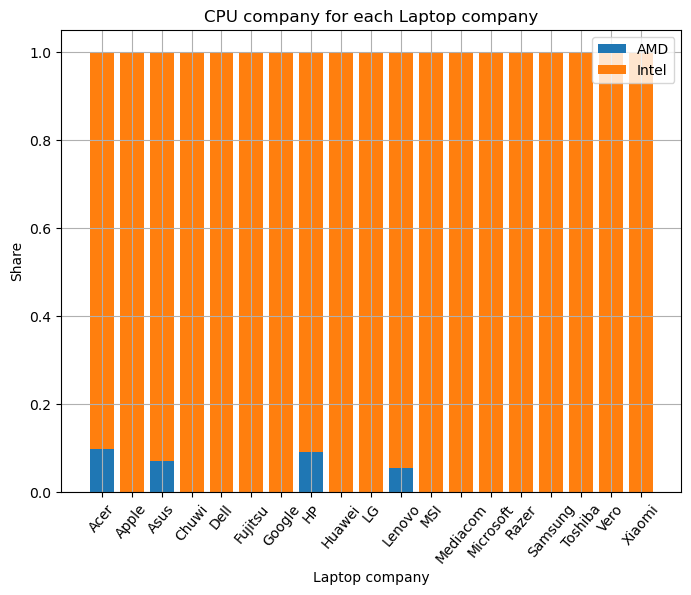

In [25]:
plt.figure(figsize=(8, 6))

n_ticks = np.arange(len(data1n.index))

plt.bar(n_ticks, data1n.AMD)
plt.bar(n_ticks, data1n.Intel, bottom=data1n.AMD)
plt.xticks(n_ticks, data1n.index, rotation=50)
plt.legend(data1n.columns)
plt.title('CPU company for each Laptop company')
plt.xlabel('Laptop company')
plt.ylabel('Share')
plt.grid();

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
Картина немного другая из-за Memory_Type

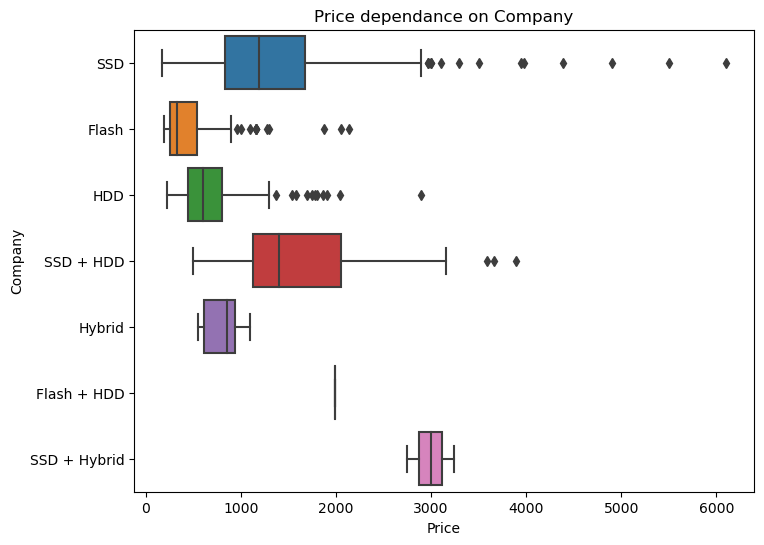

In [26]:
plt.figure(figsize=(8,6))

sns.boxplot(x=df.Price_euros, y=df.Memory_Type, whis=1.5)

plt.title('Price dependance on Company')
plt.xlabel('Price')
plt.ylabel('Company')
plt.show;

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

In [27]:
data2 = df.copy()
data2['Ram_n'] = data2.Ram.apply(lambda x: int(x[0:-2]))
data2.sort_values('Ram_n', inplace=True)
data2.drop(columns='Ram_n', inplace=True)

data2[395:400]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type,SSD
1085,1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54,1030.99,500,HDD,0
1107,1122,Lenovo,Yoga 500-15ISK,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.10,867.00,256,SSD,1
557,564,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.80,949.00,1152,SSD + HDD,1
155,158,HP,15-BS103nv (i5-8250U/6GB/256GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,6GB,256GB SSD,AMD Radeon 520,Windows 10,1.91,619.00,256,SSD,1
105,108,HP,Pavilion 14-BK001nv,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58,659.00,256,SSD,1


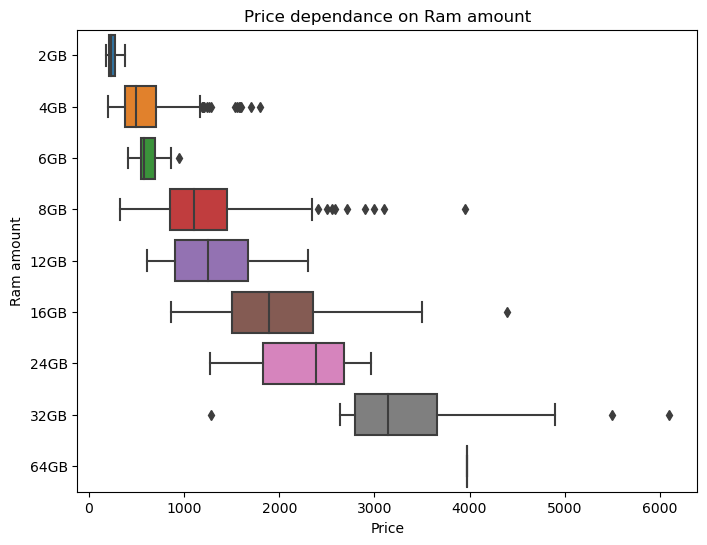

In [29]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data2.Price_euros, y=data2.Ram, whis=1.5)

plt.title('Price dependance on Ram amount')
plt.xlabel('Price')
plt.ylabel('Ram amount')
plt.show;